**<font color=red> AMACIMIZ**

Elimizde filmler ve özellikleri ile alakalı bilgiler mevcut. "Weighted Rating" - "Ağırlıklı Puan" formülünü kullanarak hem en popüler hem de en yüksek puan almış film tavsiyesi oluşturacağız.

Ağırlıklı Puan yöntemi, genellikle hem popülerliği hem de yüksek puanları dikkate alarak bir denge sağlamaya çalışır. Bu nedenle, en popüler ve en yüksek puan alan öğeler, bu yöntemle daha yüksek ağırlıklı puanlar alırlar.

Bu formülde, bir öğenin ağırlıklı puanı, hem aldığı puanların ortalaması hem de toplam değerlendirme sayısı göz önüne alınarak hesaplanır. Bu sayede, çok az değerlendirme almış öğelerin ağırlıklı puanı, genel puanın ağırlıklı ortalamasına daha fazla yaklaşır.

Bu yöntem, özellikle kullanıcı değerlendirmeleri düşük sayıda olan öğeleri değerlendirmek veya önerilerde bulunmak için kullanışlı olabilir. Ağırlıklı puanlama, kullanıcıların gerçek deneyimlerine dayanan değerlendirmelerin etkilerini azaltarak daha dengeli sonuçlar elde etmeye çalışır.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
# kullanacağımız kolonları çekelim

df = df[["original_title","popularity","vote_average","vote_count"]]
df.head()

,original_title,popularity,vote_average,vote_count
0,Avatar,150.437577,7.2,11800
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500
2,Spectre,107.376788,6.3,4466
3,The Dark Knight Rises,112.312950,7.6,9106
4,John Carter,43.926995,6.1,2124


In [5]:
# "Weighted Rating" - "Ağırlıklı Puan" hesaplayalım ve sutun olarak ekleyelim.

# V:Filmlere verilen toplam oy sayısı.
# R:Bir filmin ortalama oy değeri.
# C:Tüm filmlerin ortalama oy değeri.
# m:Film için verilen oyların toplam sayısının çeyreği.

V = df["vote_count"]                    
R = df["vote_average"]                  
C = df["vote_average"].mean()               
m = df["vote_count"].quantile(0.75)  

# formülümüzü yazıyoruz

df['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)
df.head()

,original_title,popularity,vote_average,vote_count,weighted_average
0,Avatar,150.437577,7.2,11800,7.134875
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.786315
2,Spectre,107.376788,6.3,4466,6.270561
3,The Dark Knight Rises,112.312950,7.6,9106,7.487101
4,John Carter,43.926995,6.1,2124,6.097983


In [8]:
# Ağırlıklı Puan sütunu üzerinden verilerimizi azalan şekilde sıralıyoruz.

df = df.sort_values(by="weighted_average",ascending=False)
df.head()

,original_title,popularity,vote_average,vote_count,weighted_average
1881,The Shawshank Redemption,136.747729,8.5,8205,8.301547
3337,The Godfather,143.659698,8.4,5893,8.143459
662,Fight Club,146.757391,8.3,9413,8.139688
3232,Pulp Fiction,121.463076,8.3,8428,8.122458
65,The Dark Knight,187.322927,8.2,12002,8.078054


**<font color=red>GRAFİK ÜZERİNDE GÖSTERMEK**

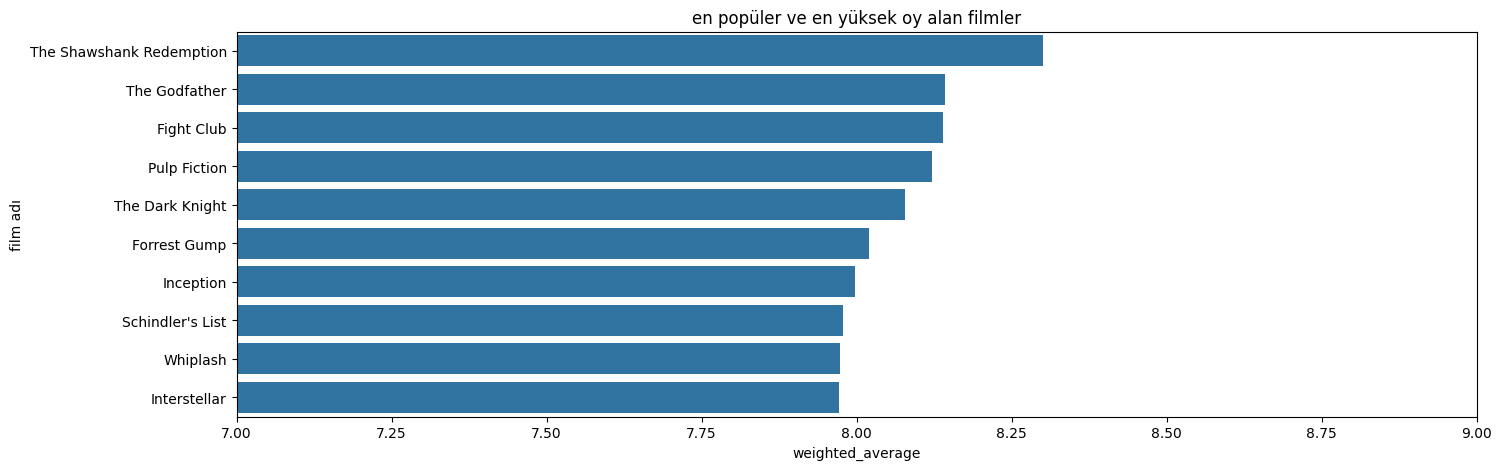

In [14]:
# verimiz içinde bulunan filmlerin, hesaplamış olduğumuz weighted_average grafiğini çizelim ve en popüler ve en yüksek oy almış ilk 10 filmimizi sıralayalım

plt.figure(figsize=(16,5))
ax = sns.barplot(x=df.weighted_average.head(10), y=df.original_title.head(10))
plt.xlim(7,9)
plt.title("en popüler ve en yüksek oy alan filmler")
plt.ylabel("film adı")
plt.show()

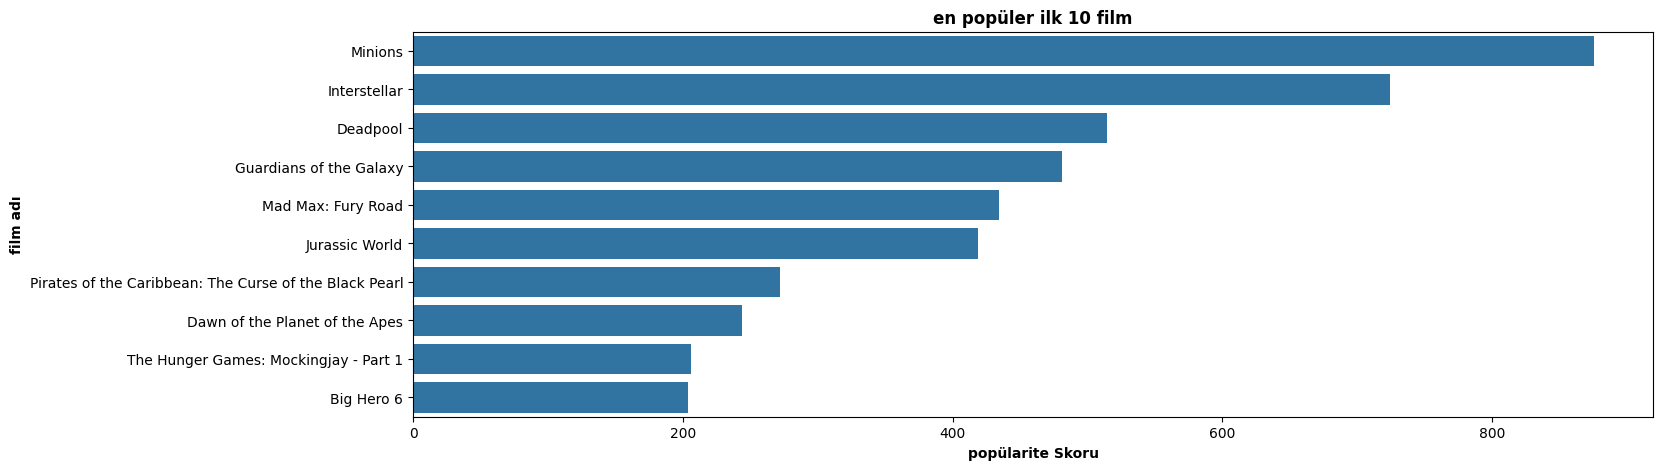

In [17]:
# birde verimiz içinde ki popularity sutununu kullanarak en popüler ilk 10 filmi görelim

popular = df.sort_values(by="popularity",ascending=False)

plt.figure(figsize=(16,5))
ax = sns.barplot(x=popular.popularity.head(10), y=popular.original_title.head(10))
plt.title("en popüler ilk 10 film",weight="bold")
plt.xlabel("popülarite Skoru",weight="bold")
plt.ylabel("film adı",weight="bold")
plt.show()